# Kelompok Triple G

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [3]:
df

Suburb           Address  Rooms Type      Price Method  \
0            Abbotsford     49 Lithgow St      3    h  1490000.0      S   
1            Abbotsford     59A Turner St      3    h  1220000.0      S   
2            Abbotsford     119B Yarra St      3    h  1420000.0      S   
3            Aberfeldie        68 Vida St      3    h  1515000.0      S   
4          Airport West  92 Clydesdale Rd      2    h   670000.0      S   
...                 ...               ...    ...  ...        ...    ...   
63018     Roxburgh Park         3 Carr Pl      3    h   566000.0      S   
63019     Roxburgh Park       9 Parker Ct      3    h   500000.0      S   
63020     Roxburgh Park    5 Parkinson Wy      3    h   545000.0      S   
63021        Thomastown    3/1 Travers St      3    u        NaN     PI   
63022  Williams Landing       1 Diadem Wy      4    h        NaN     SP   

        SellerG        Date  Postcode             Regionname  Propertycount  \
0        Jellis   1/04/2017      3067  Northern Metropolitan           4019   
1      Marshall   1/04/2017      3067  Northern Metropolitan           4019   
2        Nelson   1/04/2017      3067  Northern Metropolitan           4019   
3         Barry   1/04/2017      3040   Western Metropolitan           1543   
4        Nelson   1/04/2017      3042   Western Metropolitan           3464   
...         ...         ...       ...                    ...            ...   
63018     Raine  31/03/2018      3064  Northern Metropolitan           5833   
63019     Raine  31/03/2018      3064  Northern Metropolitan           5833   
63020     Raine  31/03/2018      3064  Northern Metropolitan           5833   
63021     Barry  31/03/2018      3074  Northern Metropolitan           7955   
63022    Aussie  31/03/2018      3027   Western Metropolitan           1999   

       Distance                 CouncilArea  
0           3.0          Yarra City Council  
1           3.0          Yarra City Council  
2           3.0          Yarra City Council  
3           7.5  Moonee Valley City Council  
4          10.4  Moonee Valley City Council  
...         ...                         ...  
63018      20.6           Hume City Council  
63019      20.6           Hume City Council  
63020      20.6           Hume City Council  
63021      15.3     Whittlesea City Council  
63022      17.6        Wyndham City Council  

[63023 rows x 13 columns]

# EDA dan DATA CLEANSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


### Penjelasan Kolom
1. Suburb: bagian pinggir kota
2. Address: alamat
3. Rooms: jumlah ruangan
4. Type: jenis rumah,  br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.
5. Price: harga dalam dollar australia
6. Method: metode penjualan,
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available
7. SellerG: agen properti
8. Date: tanggal
9. Postcode: kodepos
10. Regionname: General Region (West, North West, North, North east …etc)
11. Propertycount: jumlah properti yang tersedia di pinggir kota
12. Distance: jarak dari CBD dalam Kilometres
13. CouncilArea: Pemerintahan daerah

In [5]:
df["Postcode"]=df["Postcode"].astype("object")
df["Rooms"]=df["Rooms"].astype("object")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  object 
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  object 
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 6.3+ MB


Kode pos pada dataset umumnya dianggap sebagai data kategorikal. Meskipun kode pos terdiri dari angka, setiap kode pos mewakili wilayah atau lokasi tertentu. Dalam konteks analisis data, kode pos lebih sering dianggap sebagai variabel kategorikal karena mereka mengidentifikasi daerah atau lokasi geografis yang berbeda, bukan nilai numerik yang bisa dihitung atau dibandingkan secara matematis

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [7]:
# Menghapus nilai null dan mengupdate DataFrame asli
df.dropna(axis=0, inplace=True)

# Memeriksa jumlah nilai null setelah operasi
print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64


In [8]:
# Mengecek data duplikat
df.duplicated().sum()

1

In [9]:
# Melihat kolom numerik dan kategorikal
num_cols = df.select_dtypes(exclude='object').columns
obj_cols = df.select_dtypes(include='object').columns

print(f'Numerical Columns : {num_cols}', end='\n\n')
print(f'Object Columns : {obj_cols}')

Numerical Columns : Index(['Price', 'Propertycount', 'Distance'], dtype='object')

Object Columns : Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Postcode', 'Regionname', 'CouncilArea'],
      dtype='object')


### Cek Outliers

In [10]:
df.describe()

Price  Propertycount      Distance
count  4.843300e+04   48433.000000  48433.000000
mean   9.978982e+05    7566.399913     12.702761
std    5.934989e+05    4457.405884      7.550030
min    8.500000e+04      39.000000      0.000000
25%    6.200000e+05    4280.000000      7.000000
50%    8.300000e+05    6567.000000     11.700000
75%    1.220000e+06   10412.000000     16.700000
max    1.120000e+07   21650.000000     55.800000

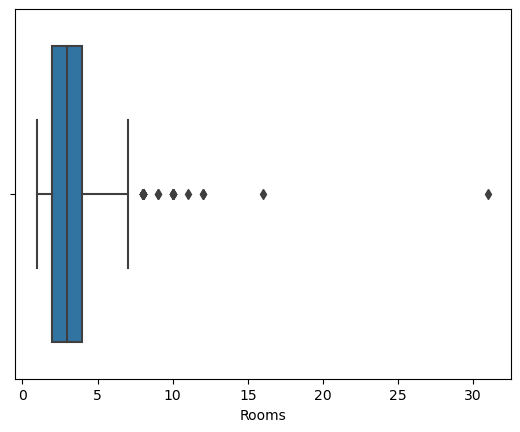

In [11]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Rooms')
plt.show() 

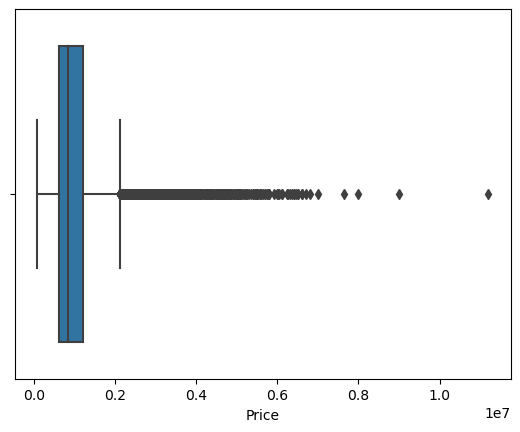

In [12]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Price')
plt.show() 

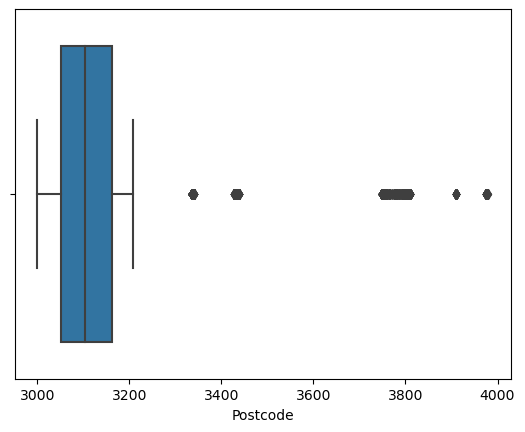

In [13]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Postcode')
plt.show() 

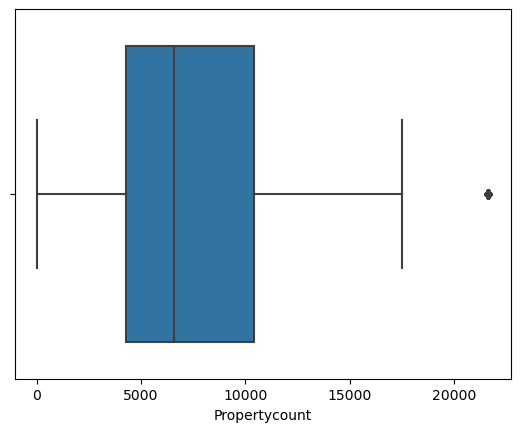

In [14]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Propertycount')
plt.show() 

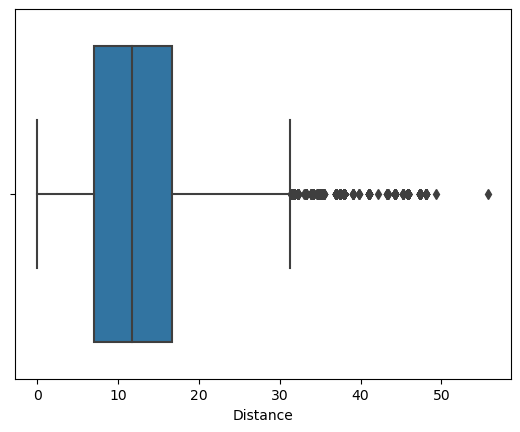

In [15]:
fig = plt.figure()  
ax = sns.boxplot(data = df, x = 'Distance')
plt.show() 

Data-data outliers di atas adalah valid jadi tidak kami hapus.

# Data Visualization

### Melihat hubungan Suburb dengan Rata-rata Price

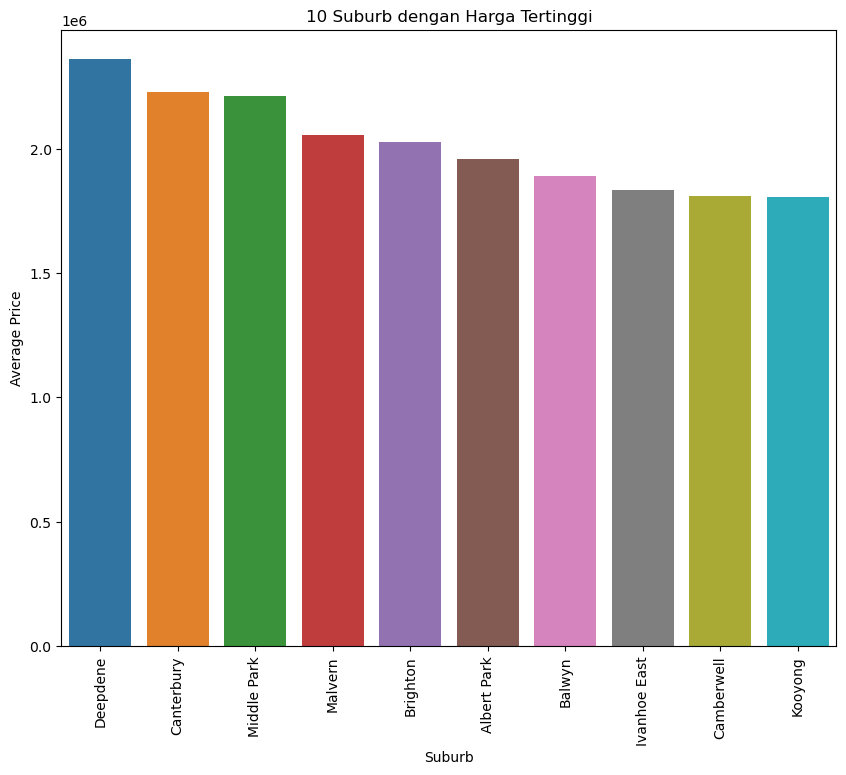

In [16]:
df_copy = df.copy()
plt.rcParams['figure.figsize'] = (10, 8)
suburb_price_df = df_copy[['Suburb', 'Price']]
average_price_by_suburb = suburb_price_df.groupby('Suburb', as_index=False).mean().sort_values(by='Price', ascending=False)[:10]
sns.barplot(x='Suburb', y='Price', data=average_price_by_suburb)
plt.xticks(rotation=90)
plt.xlabel('Suburb')
plt.ylabel('Average Price')
plt.title('10 Suburb dengan Harga Tertinggi')
plt.show()

In [17]:
df_copy = df.copy()
suburb_price_df = df_copy[['Suburb', 'Price']]
average_price_by_suburb = suburb_price_df.groupby('Suburb', as_index=False).mean().sort_values(by='Price', ascending=False)[:10]
print(average_price_by_suburb)

           Suburb         Price
109      Deepdene  2.359806e+06
65     Canterbury  2.228267e+06
228   Middle Park  2.211656e+06
215       Malvern  2.055545e+06
45       Brighton  2.028911e+06
4     Albert Park  1.959777e+06
21         Balwyn  1.891814e+06
181  Ivanhoe East  1.835818e+06
63     Camberwell  1.810615e+06
202       Kooyong  1.807769e+06


##### Dari data di atas maka dapat disimpulkan suburb dengan harga tertinggi terdapat di suburb Deepdene.

### Melihat hubungan Rooms (jumlah ruangan) dengan Price

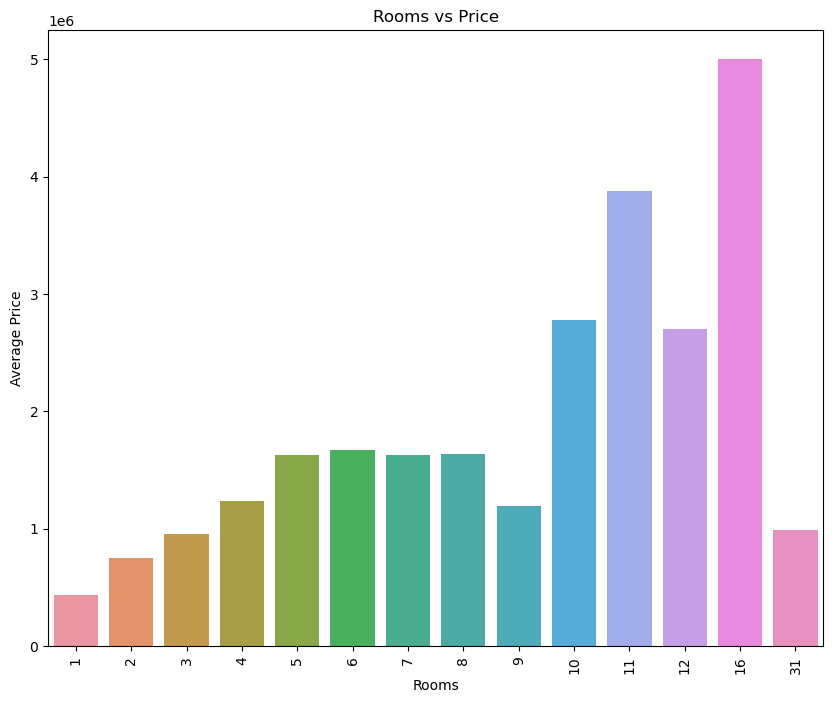

In [18]:
df_copy = df.copy()
plt.rcParams['figure.figsize'] = (10, 8)
price_df = df_copy[['Rooms', 'Price']]
average_price= price_df.groupby('Rooms', as_index=False).mean().sort_values(by='Price', ascending=False)
sns.barplot(x='Rooms', y='Price', data=average_price)
plt.xticks(rotation=90)
plt.xlabel('Rooms')
plt.ylabel('Average Price')
plt.title('Rooms vs Price')
plt.show()

In [19]:
df_copy = df.copy()
price_df = df_copy[['Rooms', 'Price']]
average_price = price_df.groupby('Rooms', as_index=False).mean().sort_values(by='Price', ascending=False)
print(average_price)

   Rooms         Price
12    16  5.000000e+06
10    11  3.880000e+06
9     10  2.781667e+06
11    12  2.705000e+06
5      6  1.668343e+06
7      8  1.634211e+06
6      7  1.628479e+06
4      5  1.627292e+06
3      4  1.236715e+06
8      9  1.190000e+06
13    31  9.900000e+05
2      3  9.585280e+05
1      2  7.460926e+05
0      1  4.332256e+05


###### Dari visualisasi di atas maka dapat disimpulkan bahwa semakin banyak jumlah ruangannya maka harganya semakin mahal

### Melihat hubungan Type  dengan Price

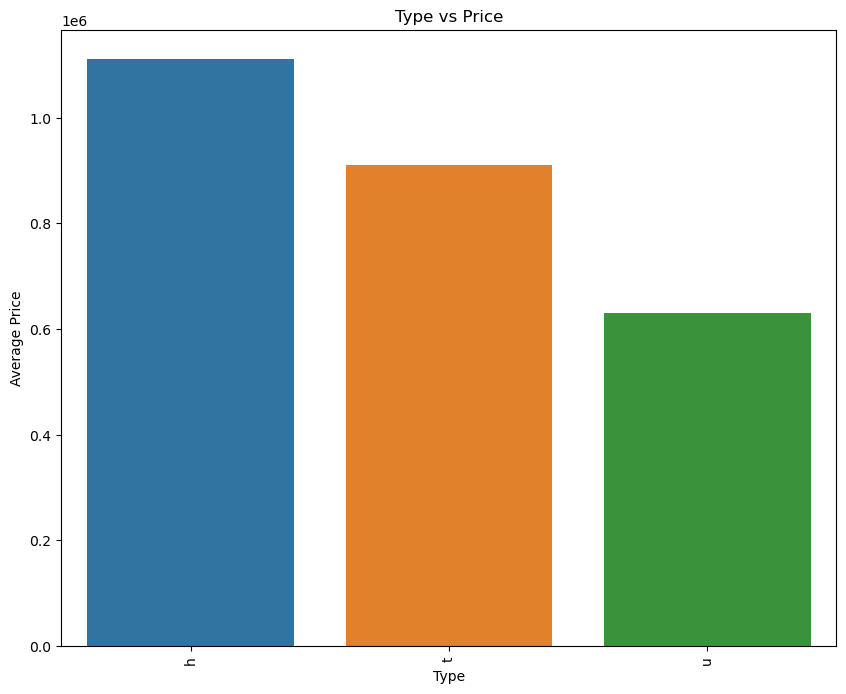

In [20]:
df_copy = df.copy()
method_price_df = df_copy[['Type', 'Price']]
average_price_by_method = method_price_df.groupby('Type', as_index=False).mean().sort_values(by='Price', ascending=False)
sns.barplot(x='Type', y='Price', data=average_price_by_method)
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Type vs Price')
plt.show()

In [21]:
df_copy = df.copy()
price_df = df_copy[['Type', 'Price']]
average_price = price_df.groupby('Type', as_index=False).mean().sort_values(by='Price', ascending=False)
print(average_price)

  Type         Price
0    h  1.110587e+06
1    t  9.111480e+05
2    u  6.301053e+05


Keterangan: 
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

Tipe yang memiliki harga yang paling tinggi adalah Townhouse

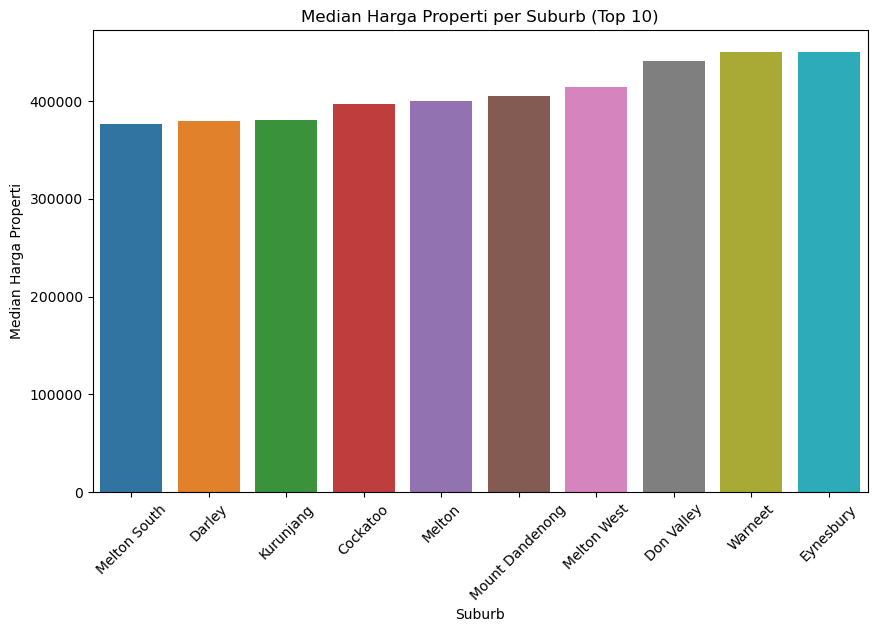

In [22]:
# Mengurutkan data berdasarkan median harga properti per Suburb
median_price_per_suburb = df.groupby('Suburb')['Price'].median().sort_values(ascending=True).head(10)

# Mengurutkan data berdasarkan jumlah properti yang tersedia per Suburb
prop_count_per_suburb = df['Suburb'].value_counts().head(10)

# Mengurutkan data berdasarkan median jarak ke CBD per Suburb
median_distance_per_suburb = df.groupby('Suburb')['Distance'].median().sort_values(ascending=True).head(10)

# Visualisasi Median Harga Properti per Suburb (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=median_price_per_suburb.index, y=median_price_per_suburb.values)
plt.xticks(rotation=45)
plt.title('Median Harga Properti per Suburb (Top 10)')
plt.xlabel('Suburb')
plt.ylabel('Median Harga Properti')
plt.show()

##### Harga tertinggi untuk Properti berada di suburb Warneet dan Eynesbury

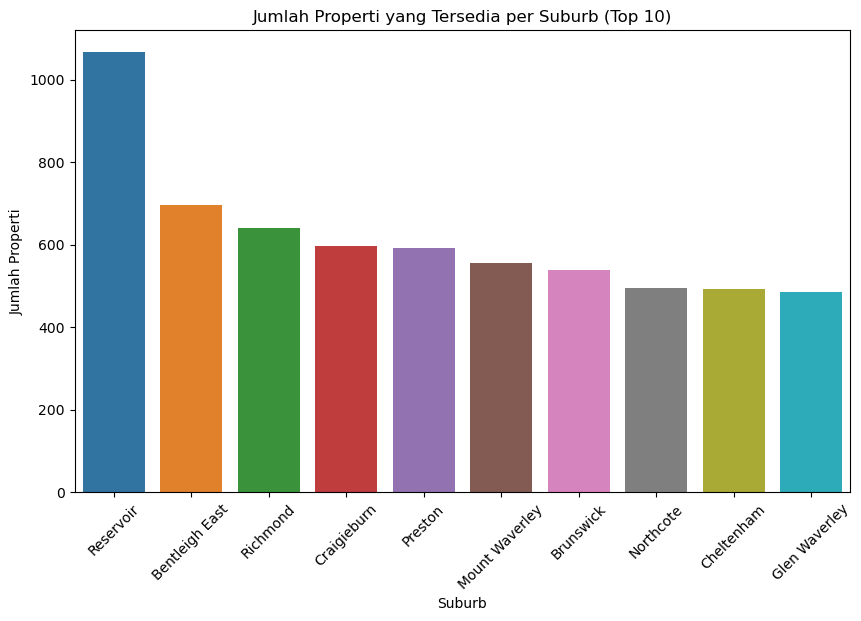

In [23]:
# Visualisasi Jumlah Properti yang Tersedia per Suburb (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=prop_count_per_suburb.index, y=prop_count_per_suburb.values)
plt.xticks(rotation=45)
plt.title('Jumlah Properti yang Tersedia per Suburb (Top 10)')
plt.xlabel('Suburb')
plt.ylabel('Jumlah Properti')
plt.show()

##### Properti terbanyak berada di suburb Reservoir.

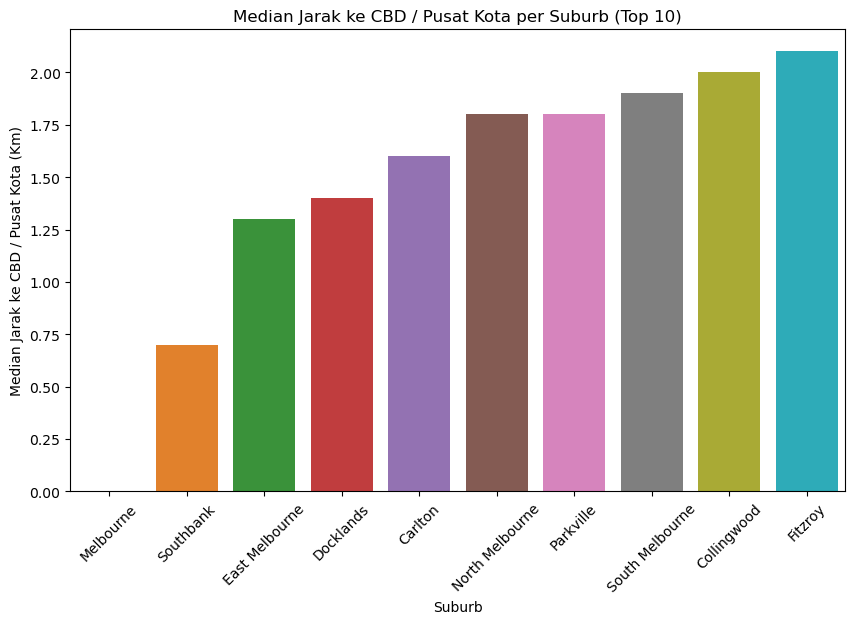

In [24]:
# Visualisasi Median Jarak ke Pusat Kota per Suburb (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=median_distance_per_suburb.index, y=median_distance_per_suburb.values)
plt.xticks(rotation=45)
plt.title('Median Jarak ke CBD / Pusat Kota per Suburb (Top 10)')
plt.xlabel('Suburb')
plt.ylabel('Median Jarak ke CBD / Pusat Kota (Km)')
plt.show()


##### Urutan suburb dari yang paling dekat dengan pusat kota

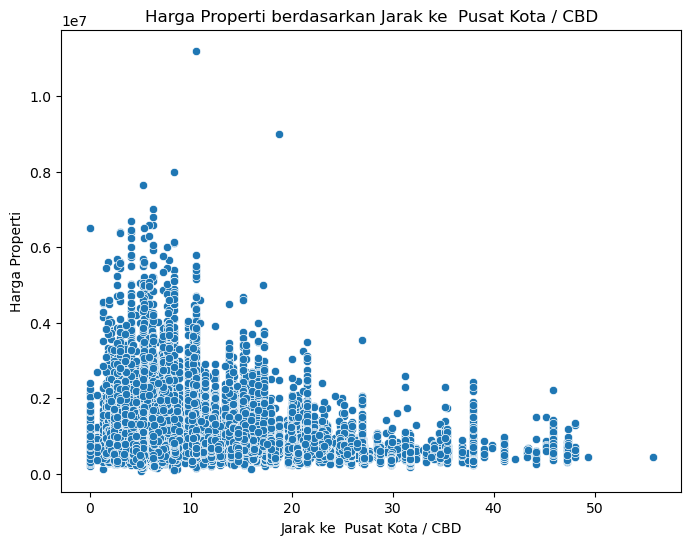

In [25]:
# Visualisasi Harga Properti berdasarkan Jarak ke Pusat Kota / CBD
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Distance', y='Price')
plt.title('Harga Properti berdasarkan Jarak ke  Pusat Kota / CBD')
plt.xlabel('Jarak ke  Pusat Kota / CBD')
plt.ylabel('Harga Properti')
plt.show()


##### Semakin dekat dengan pusat kota, maka harga properti cenderung lebih mahal.

# Modeling

In [26]:
kategori = df.select_dtypes(include=['object']).columns

label_encoders = {}  # Dictionary to store LabelEncoder objects for each column

for col in kategori:
    label_encoders[col] = preprocessing.LabelEncoder()  # Initialize LabelEncoder for each column
    df[col] = label_encoders[col].fit_transform(df[col].astype(str))  # Fit and transform the column
df

Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  \
0           0    32929      6     0  1490000.0       1      180     0   
1           0    36347      6     0  1220000.0       1      225     0   
2           0     6375      6     0  1420000.0       1      253     0   
3           1    38887      6     0  1515000.0       1       28     0   
4           2    44313      5     0   670000.0       1      253     0   
...       ...      ...    ...   ...        ...     ...      ...   ...   
63016     147    30258      5     2   347700.0       3       14    88   
63017     275    19221      6     0   808000.0       1      305    88   
63018     288    22867      6     0   566000.0       1      306    88   
63019     288    43692      6     0   500000.0       1      306    88   
63020     288    33781      6     0   545000.0       1      306    88   

       Postcode  Regionname  Propertycount  Distance  CouncilArea  
0            54           2           4019       3.0           32  
1            54           2           4019       3.0           32  
2            54           2           4019       3.0           32  
3            30           6           1543       7.5           22  
4            32           6           3464      10.4           22  
...         ...         ...            ...       ...          ...  
63016       166           4          17055      38.0            7  
63017        58           2          14577       8.4            6  
63018        51           2           5833      20.6           11  
63019        51           2           5833      20.6           11  
63020        51           2           5833      20.6           11  

[48433 rows x 13 columns]

In [27]:
df.nunique()

Suburb             370
Address          44739
Rooms               14
Type                 3
Price             3417
Method               5
SellerG            422
Date               112
Postcode           221
Regionname           8
Propertycount      359
Distance           176
CouncilArea         34
dtype: int64

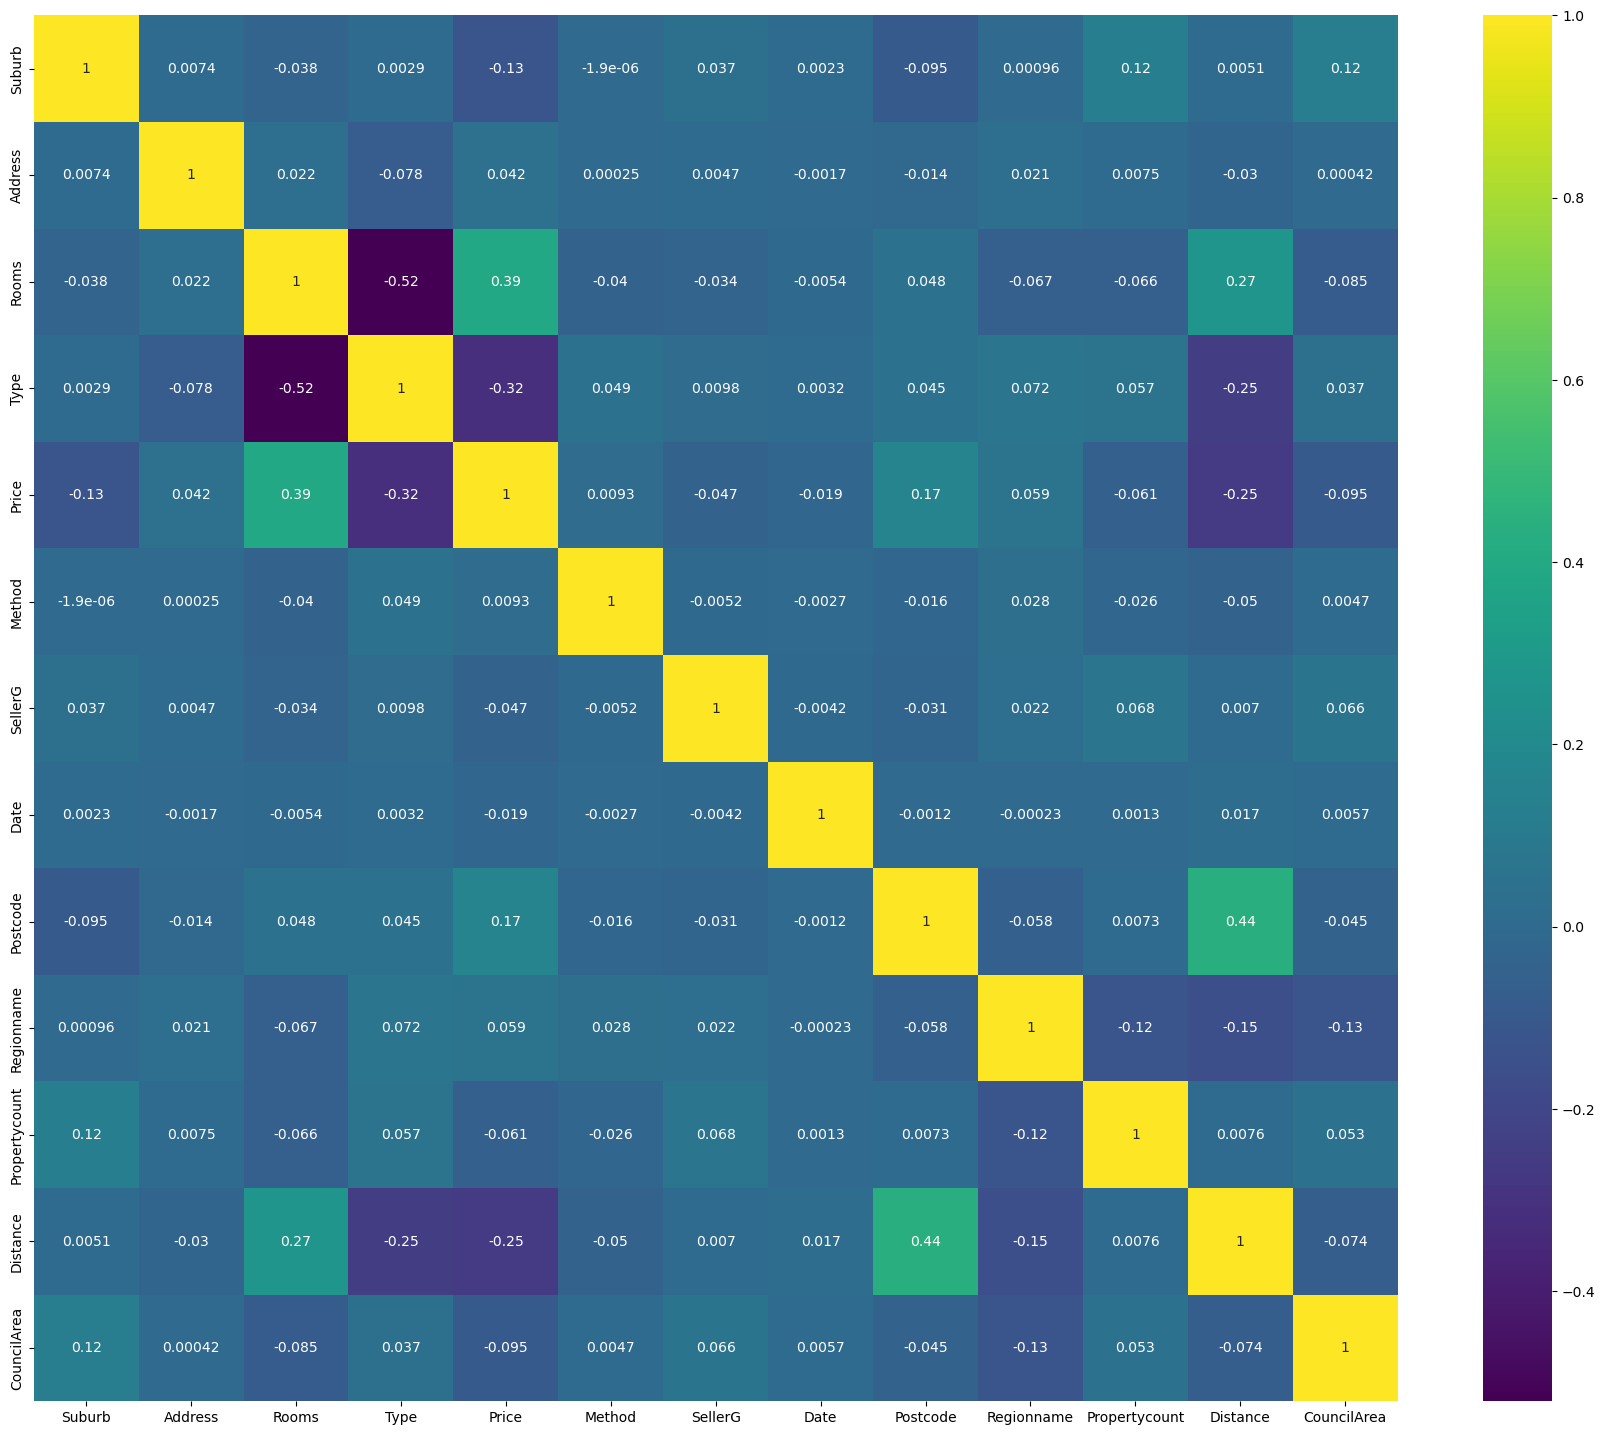

In [28]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(22, 18),dpi=100)  # Adjust the figsize parameter to make the plot bigger
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [29]:
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27182 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27182 non-null  int32  
 1   Address        27182 non-null  int32  
 2   Rooms          27182 non-null  int32  
 3   Type           27182 non-null  int32  
 4   Price          27182 non-null  float64
 5   Method         27182 non-null  int32  
 6   SellerG        27182 non-null  int32  
 7   Date           27182 non-null  int32  
 8   Postcode       27182 non-null  int32  
 9   Regionname     27182 non-null  int32  
 10  Propertycount  27182 non-null  int64  
 11  Distance       27182 non-null  float64
 12  CouncilArea    27182 non-null  int32  
dtypes: float64(2), int32(10), int64(1)
memory usage: 1.9 MB


In [31]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

drop = df[['Price']]
X = df.drop(drop, axis=1)
y = df[['Price']]

# scaler = MinMaxScaler()
scaler = StandardScaler()
# Fit the scaler to your data and transform it
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# rus = RandomUnderSampler(random_state=21)
# # smote = SMOTE(random_state=2119)
# X_train, y_train = rus.fit_resample(X_train, y_train)


# Create a SelectKBest instance with f_regression as the scoring function and specify the number of features (k) to select
selector = SelectKBest(score_func=f_regression, k='all')
# Fit the selector to your data (X, y) and transform X to select the top k features
X_train_selected = selector.fit_transform(X_train, y_train)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Optionally, you can also get the scores of each feature
feature_scores = selector.scores_
# Transform the test set using the same selector
X_test_selected = selector.transform(X_test)

d:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.model_selection import KFold

def k_fold_eval(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    rmse_list = []
    mae_list = []
    r2_list = []

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)

        rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_fold))
        mae_fold = mean_absolute_error(y_val_fold, y_pred_fold)
        r2_fold = r2_score(y_val_fold, y_pred_fold)

        rmse_list.append(rmse_fold)
        mae_list.append(mae_fold)
        r2_list.append(r2_fold)

    return {
        'mean_rmse': np.mean(rmse_list),
        'std_rmse': np.std(rmse_list),
        'mean_mae': np.mean(mae_list),
        'std_mae': np.std(mae_list),
        'mean_r2': np.mean(r2_list),
        'std_r2': np.std(r2_list)
    }

# Ensure y_train is a numpy array
y_train_array = np.array(y_train)

In [33]:
# from skopt import BayesSearchCV


# # Define the parameter search space
# param_space = {
#     'n_estimators': (50, 500),
#     'max_depth': (3, 10),
#     'learning_rate': (0.01, 0.3, 'log-uniform'),
#     'subsample': (0.6, 1.0),
#     'colsample_bytree': (0.6, 1.0),
#     'gamma': (0, 5),
#     'reg_alpha': (0, 5),
#     'reg_lambda': (0, 5),
# }

# # Initialize the XGBRegressor
# xgb_model = xgb.XGBRegressor(random_state=21)

# # Setup BayesSearchCV
# bayes_search = BayesSearchCV(
#     estimator=xgb_model,
#     search_spaces=param_space,
#     n_iter=50,  # Number of parameter settings that are sampled
#     cv=3,       # Cross-validation splitting strategy
#     n_jobs=-1,  # Use all available cores
#     random_state=21
# )

# # Perform the hyperparameter search
# bayes_search.fit(X_train_selected, y_train)

# # Get the best model from the search
# best_model = bayes_search.best_estimator_

# # Predict on the test set
# y_pred_xgb = best_model.predict(X_test_selected)

# # Evaluation
# xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
# xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
# xgb_r2 = r2_score(y_test, y_pred_xgb)

# # Print the evaluation metrics
# print("Evaluasi model XGBRegressor setelah Bayes Search CV:")
# print("RMSE:", xgb_rmse)
# print("MAE:", xgb_mae)
# print("R2:", xgb_r2)

# # Print the best hyperparameters
# print("Best hyperparameters found by Bayes Search CV:", bayes_search.best_params_)

In [34]:
best_params = {
    'colsample_bytree': 0.6,
    'gamma': 5,
    'learning_rate': 0.028450215887438113,
    'max_depth': 8,
    'n_estimators': 411,
    'reg_alpha': 0,
    'reg_lambda': 5,
    'subsample': 0.6
}

xgb_model = xgb.XGBRegressor(random_state=21, **best_params)
xgb_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluation
# RMSE
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# MAE
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

# R2 score
xgb_r2 = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print("Evaluasi model XGBRegressor:")
print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)
print("R2:", xgb_r2)

Evaluasi model XGBRegressor:
RMSE: 186187.3994605479
MAE: 131722.8046257127
R2: 0.7697320399361751


In [35]:
xgb_model = xgb.XGBRegressor(**best_params, random_state=21)

# Perform k-fold cross-validation
evaluation_results = k_fold_eval(xgb_model, X_train_selected, y_train_array, n_splits=5)

# Print the evaluation results
print("K-fold cross-validation results:")
print(f"Mean RMSE: {evaluation_results['mean_rmse']:.4f}, Std RMSE: {evaluation_results['std_rmse']:.4f}")
print(f"Mean MAE: {evaluation_results['mean_mae']:.4f}, Std MAE: {evaluation_results['std_mae']:.4f}")
print(f"Mean R2: {evaluation_results['mean_r2']:.4f}, Std R2: {evaluation_results['std_r2']:.4f}")

K-fold cross-validation results:
Mean RMSE: 187843.1484, Std RMSE: 2271.9008
Mean MAE: 135464.2272, Std MAE: 1067.8936
Mean R2: 0.7671, Std R2: 0.0027


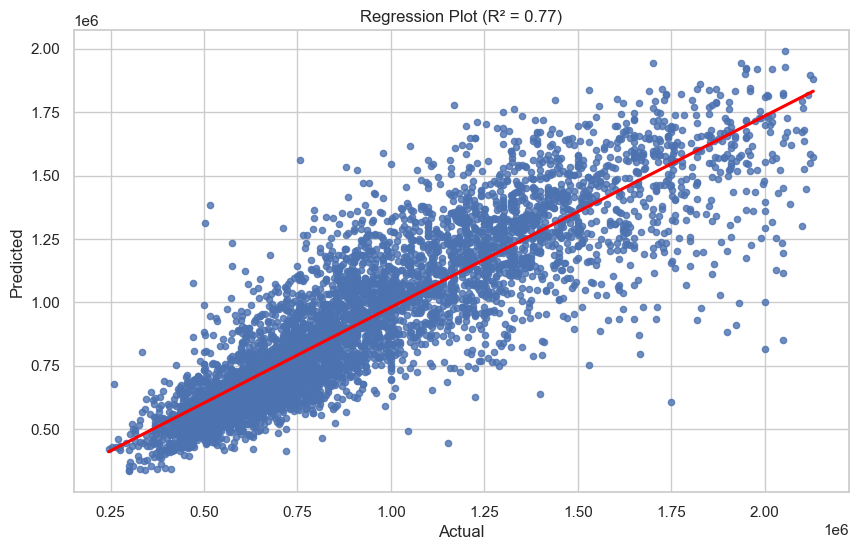

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Flatten the arrays to 1-dimensional
y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred_xgb.flatten()

# Calculate R-squared
r2 = r2_score(y_test_flat, y_pred_flat)

# Create a DataFrame for visualization
df_vis = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat})

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.regplot(x='Actual', y='Predicted', data=df_vis, scatter_kws={'s': 20}, line_kws={'color': 'red'}, ci=None)
plt.title(f'Regression Plot (R² = {r2:.2f})')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
